## Collaborative Filtering

In [5]:
#needed to work!
available_graphics_toolkits
graphics_toolkit('gnuplot')

ans = 
{
  [1,1] = gnuplot
}


In [6]:
%% Initialization
clear ; close all; clc

warning ("off", "Octave:broadcast");
warning ("off", "Octave:possible-matlab-short-circuit-operator");
warning ("off", "Octave:divide-by-zero");

In [8]:
%plot -f png

## Loading movie ratings dataset

Loading movie ratings dataset.

Average rating for movie 1 (Toy Story): 3.878319 / 5



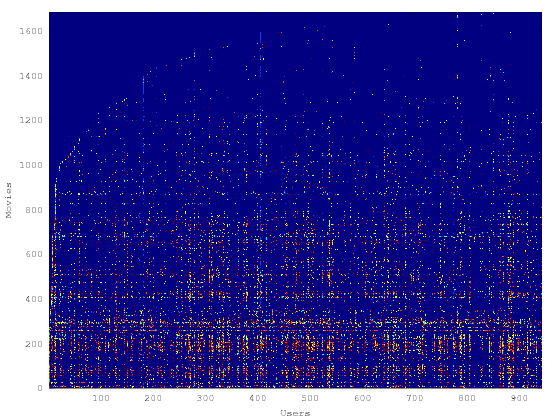

In [9]:
fprintf('Loading movie ratings dataset.\n\n');

%  Load data
load ('data/ex8_movies.mat');

%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

%  From the matrix, we can compute statistics like average rating.
fprintf('Average rating for movie 1 (Toy Story): %f / 5\n\n', ...
        mean(Y(1, R(1, :))));

%  We can "visualize" the ratings matrix by plotting it with imagesc
imagesc(Y);
ylabel('Movies');
xlabel('Users');

## Collaborative Filtering Cost Function

In [11]:
%  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
load ('data/ex8_movieParams.mat');

%  Reduce the data set size so that this runs faster
num_users = 4; num_movies = 5; num_features = 3;
X = X(1:num_movies, 1:num_features);
Theta = Theta(1:num_users, 1:num_features);
Y = Y(1:num_movies, 1:num_users);
R = R(1:num_movies, 1:num_users);

%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 0);
           
fprintf(['Cost at loaded parameters: %f '...
         '\n(this value should be about 22.22)\n'], J);

Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


## Collaborative Filtering Gradient

In [12]:
fprintf('\nChecking Gradients (without regularization) ... \n');

%  Check gradients by running checkNNGradients
checkCostFunction;


Checking Gradients (without regularization) ... 
  -1.415802  -1.415802
  -0.047345  -0.047345
  -0.765169  -0.765169
   4.015586   4.015586
   1.259548   1.259548
   1.106471   1.106471
  -0.490297  -0.490297
   1.915054   1.915054
   8.159285   8.159285
   2.088017   2.088017
   0.167033   0.167033
   0.794068   0.794068
   0.549966   0.549966
  -1.151292  -1.151292
   2.286184   2.286184
  -0.147696  -0.147696
  -5.054034  -5.054034
   0.514301   0.514301
  -0.651354  -0.651354
   4.057541   4.057541
   0.705903   0.705903
  -4.803362  -4.803362
  -0.097115  -0.097115
  -4.780246  -4.780246
  -2.353773  -2.353773
   0.226006   0.226006
  -3.008857  -3.008857
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 1.31547e-12


## Collaborative Filtering Cost Regularization

In [13]:
%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 1.5);
           
fprintf(['Cost at loaded parameters (lambda = 1.5): %f '...
         '\n(this value should be about 31.34)\n'], J);

Cost at loaded parameters (lambda = 1.5): 31.344056 
(this value should be about 31.34)


## Collaborative Filtering Gradient Regularization

In [14]:
fprintf('\nChecking Gradients (with regularization) ... \n');

%  Check gradients by running checkNNGradients
checkCostFunction(1.5);


Checking Gradients (with regularization) ... 
   -3.15794   -3.15794
   -2.25128   -2.25128
    0.19592    0.19592
  -10.08219  -10.08219
    7.05857    7.05857
    1.70891    1.70891
    0.76474    0.76474
   13.05203   13.05203
    2.85823    2.85823
    0.32006    0.32006
   -2.52974   -2.52974
    9.48601    9.48601
   -4.27755   -4.27755
    2.56211    2.56211
   -1.98914   -1.98914
    3.03525    3.03525
    8.58194    8.58194
    6.97335    6.97335
   -2.72422   -2.72422
    5.44030    5.44030
   -2.90425   -2.90425
   -9.33841   -9.33841
    0.95825    0.95825
    1.27462    1.27462
    3.49060    3.49060
    0.29990    0.29990
   -1.04466   -1.04466
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 2.46325e-12


## Computing Ratings for a new user

In [16]:
movieList = loadMovieList();

%  Initialize my ratings
my_ratings = zeros(1682, 1);

% Check the file movie_idx.txt for id of each movie in our dataset
% For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings(1) = 4;

% Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings(98) = 2;

% We have selected a few movies we liked / did not like and the ratings we
% gave are as follows:
my_ratings(7) = 3;
my_ratings(12)= 5;
my_ratings(54) = 4;
my_ratings(64)= 5;
my_ratings(66)= 3;
my_ratings(69) = 5;
my_ratings(183) = 4;
my_ratings(226) = 5;
my_ratings(355)= 5;

fprintf('\n\nNew user ratings:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end



New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


## Learning Movie Ratings

In [17]:
fprintf('\nTraining collaborative filtering...\n');

%  Load data
load('data/ex8_movies.mat');

%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

%  Add our own ratings to the data matrix
Y = [my_ratings Y];
R = [(my_ratings ~= 0) R];

%  Normalize Ratings
[Ynorm, Ymean] = normalizeRatings(Y, R);

%  Useful Values
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = 10;

% Set Initial Parameters (Theta, X)
X = randn(num_movies, num_features);
Theta = randn(num_users, num_features);

initial_parameters = [X(:); Theta(:)];

% Set options for fmincg
options = optimset('GradObj', 'on', 'MaxIter', 100);

% Set Regularization
lambda = 10;
theta = fmincg (@(t)(cofiCostFunc(t, Y, R, num_users, num_movies, ...
                                num_features, lambda)), ...
                initial_parameters, options);

% Unfold the returned theta back into U and W
X = reshape(theta(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(theta(num_movies*num_features+1:end), ...
                num_users, num_features);

fprintf('Recommender system learning completed.\n');


Training collaborative filtering...
Iteration   100 | Cost: 7.205150e+04
Recommender system learning completed.


## Recommendation

In [18]:
p = X * Theta';
my_predictions = p(:,1) + Ymean;

movieList = loadMovieList();

[r, ix] = sort(my_predictions, 'descend');
fprintf('\nTop recommendations for you:\n');
for i=1:10
    j = ix(i);
    fprintf('Predicting rating %.1f for movie %s\n', my_predictions(j), ...
            movieList{j});
end

fprintf('\n\nOriginal ratings provided:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end


Top recommendations for you:
Predicting rating 8.5 for movie Star Wars (1977)
Predicting rating 8.4 for movie Shawshank Redemption, The (1994)
Predicting rating 8.4 for movie Titanic (1997)
Predicting rating 8.2 for movie Raiders of the Lost Ark (1981)
Predicting rating 8.2 for movie Schindler's List (1993)
Predicting rating 8.1 for movie Good Will Hunting (1997)
Predicting rating 8.1 for movie Usual Suspects, The (1995)
Predicting rating 8.1 for movie Godfather, The (1972)
Predicting rating 8.0 for movie Empire Strikes Back, The (1980)
Predicting rating 8.0 for movie Braveheart (1995)


Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)
